## *Generate classification data*

In [3]:
from sklearn.datasets import make_blobs
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

# Generate dataset(data points,variables,clusters,seed,std)
X_trainn, Y_trainn = make_blobs(n_samples=200, n_features=2, centers=2, random_state=42,cluster_std=2.0)

## *Plot the data*

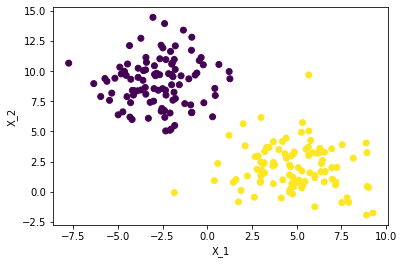

In [14]:
plt.scatter(X_trainn[:,0],X_trainn[:,1],c=Y_trainn)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()


In [5]:
Y_test = Y_trainn[150:]
# Y_test.shape

In [6]:
X_test = X_trainn[150:]
# X_test.shape

In [7]:
X_train = X_trainn[:150]

In [8]:
Y_train = Y_trainn[:150]

In [9]:
# get the index of the nearest k neibor
def find_neighbors(k, X_tr, new_point):
    neighbor_arr = []
    for i in range(len(X_tr)):
        dist = np.sqrt(sum(np.square(X_tr[i]-new_point)))
        neighbor_arr.append([i, dist])
    neighbor_arr = sorted(neighbor_arr, key = lambda x : x[1])
    
    return neighbor_arr[0:k]

In [10]:
# get the most comon class from prediction
# if more class 1 then 1 else 0
def classifier(neighbor_arr):
    class_arr = [Y_train[i[0]] for i in neighbor_arr]
    return Counter(class_arr).most_common(1)[0][0]

In [11]:
# make prediction on data set

y_pred = []
for i in range(len(X_test)):
    knn = find_neighbors(7, X_train, X_test[i])
    y_pred.append(classifier(knn))

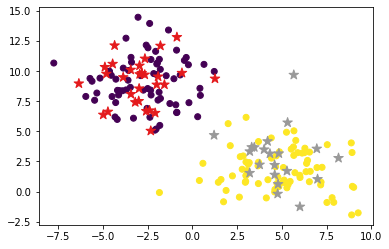

In [12]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='*',s=100, cmap='Set1')

# plot by prediction 
# plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
# plt.xlabel('X_1')
# plt.ylabel('X_2')
plt.show()